# Naive Bayes 

******

## Load data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
DATA_PATH = os.path.join(os.getcwd(), 'data')
test_data_path = os.path.join(DATA_PATH, 'test.csv')
train_data_path = os.path.join(DATA_PATH, 'train.csv')

In [3]:
df_train = pd.read_csv(train_data_path, keep_default_na=False)
df_test = pd.read_csv(test_data_path, keep_default_na=False)

In [4]:
def map_sentiment(sentiment):
    if sentiment == 'negative':
        return 0
    elif sentiment == 'neutral':
        return 1
    else:
        return 2
    
df_train['class'] = df_train['sentiment'].map(map_sentiment)
df_test['class'] = df_test['sentiment'].map(map_sentiment)


In [5]:
df_train

,textID,text,selected_text,sentiment,class
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,0
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,0
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,2
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,2


*****

## Naive Bayes

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train['text']).toarray()
X_test = vectorizer.transform(df_test['text']).toarray()

In [8]:
y_train = np.array(df_train['class'])
y_test = np.array(df_test['class'])

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
model.score(X_test, y_test)

0.37521222410865873

*****

## Threshold Trial

In [12]:
freq = X_train.sum(axis=0)
frequency = {}
for i in vectorizer.vocabulary_:
    frequency[i] = freq[vectorizer.vocabulary_[i]]
    

In [13]:
def threshold_trial(min_threshold=50, max_threshold=2000):
    word_list = []
    for i in frequency:
        if min_threshold < frequency[i] < max_threshold:
            word_list.append(i)
    frequent_vectorizer = CountVectorizer(vocabulary=word_list)
    X_train = frequent_vectorizer.transform(df_train['text']).toarray()
    X_test = frequent_vectorizer.transform(df_test['text']).toarray()
    model = GaussianNB()
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    return acc

min_thresholds = range(1, 300)
accs = []
for i in min_thresholds:
    accs.append(threshold_trial(min_threshold=i))
    

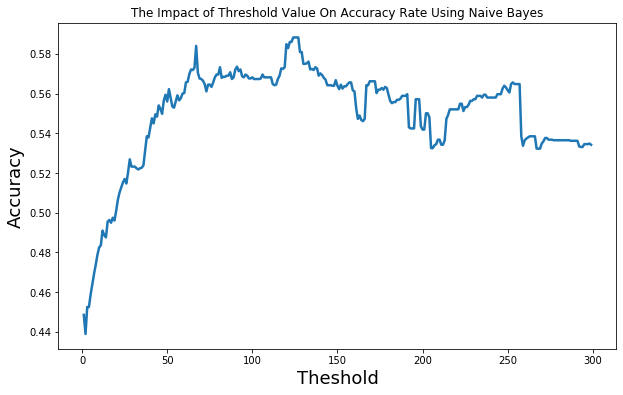

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(min_thresholds, accs, linewidth=2.5)
plt.xlabel('Theshold', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('The Impact of Threshold Value On Accuracy Rate Using Naive Bayes')
plt.show()

In [15]:
print(f"Best min threshold: {min_thresholds[accs.index(max(accs))]}\nBest Accuracy: {max(accs)}")

Best min threshold: 124
Best Accuracy: 0.5882852292020373


*****

## Word Stemming

In [16]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def porter_stem(sentence):
    words = sentence.split()
    words = [i.strip(",'.!?*;/#'") for i in words]
    stemmed_words = [porter_stemmer.stem(i) for i in words]
    return ' '.join(stemmed_words)
df_train['text_porter_stem'] = df_train['text'].map(porter_stem)
df_test['text_porter_stem'] = df_test['text'].map(porter_stem)

In [17]:
df_train

,textID,text,selected_text,sentiment,class,text_porter_stem
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1,i`d have respond if I were go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0,sooo sad I will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,0,my boss is bulli me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0,what interview leav me alon
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0,son of whi couldn`t they put them on the rele...
...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,0,wish we could come see u on denver husband los...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,0,i`v wonder about rake to the client ha made it...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,2,yay good for both of you enjoy the break - you...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,2,but it wa worth it


In [18]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train['text_porter_stem']).toarray()
X_test = vectorizer.transform(df_test['text_porter_stem']).toarray()

In [19]:
freq = X_train.sum(axis=0)
frequency = {}
for i in vectorizer.vocabulary_:
    frequency[i] = freq[vectorizer.vocabulary_[i]]

In [20]:
def stemming_threshold_trial(min_threshold=50, max_threshold=2000):
    word_list = []
    for i in frequency:
        if min_threshold < frequency[i] < max_threshold:
            word_list.append(i)
    frequent_vectorizer = CountVectorizer(vocabulary=word_list)
    X_train = frequent_vectorizer.transform(df_train['text_porter_stem']).toarray()
    X_test = frequent_vectorizer.transform(df_test['text_porter_stem']).toarray()
    model = GaussianNB()
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    return acc

stemming_accs = []
for i in min_thresholds:
    stemming_accs.append(stemming_threshold_trial(min_threshold=i))

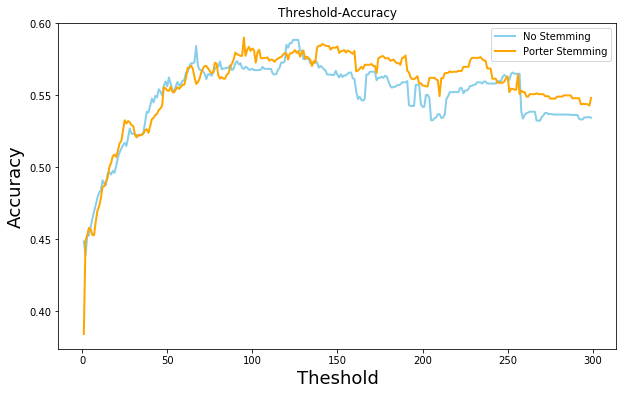

In [21]:
plt.figure(figsize=(10,6))
plt.plot(min_thresholds, accs, linewidth=2, color='skyblue',label='No Stemming')
plt.plot(min_thresholds, stemming_accs, linewidth=2, color ='orange', label='Porter Stemming')
plt.xlabel('Theshold', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.legend()
plt.title('Threshold-Accuracy')
plt.show()

*****

## TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
def tf_idf_threshold_trial(threshold):
    vectorizer = TfidfVectorizer(max_features=threshold)
    X_train = vectorizer.fit_transform(df_train['text']).toarray()
    X_test = vectorizer.transform(df_test['text']).toarray()
    y_train = df_train['class']
    y_test = df_test['class']
    model = GaussianNB()
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    return acc
tf_idf_accs = [tf_idf_threshold_trial(i) for i in min_thresholds]

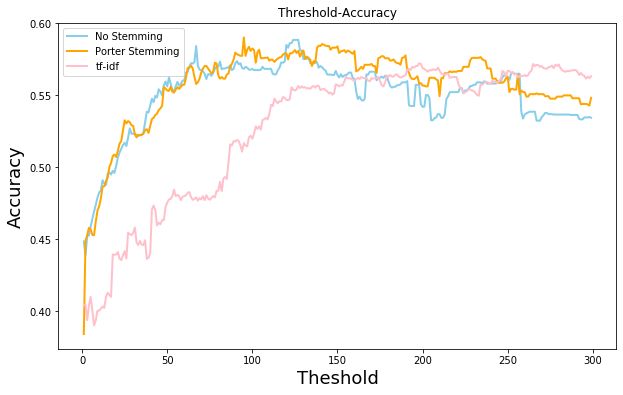

In [24]:
plt.figure(figsize=(10,6))
plt.plot(min_thresholds, accs, linewidth=2, color='skyblue',label='No Stemming')
plt.plot(min_thresholds, stemming_accs, linewidth=2, color ='orange', label='Porter Stemming')
plt.plot(min_thresholds, tf_idf_accs, linewidth=2, color ='pink', label='tf-idf')
plt.xlabel('Theshold', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.legend()
plt.title('Threshold-Accuracy')
plt.show()